In [1]:
from src import functions as fn

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Global Variables
stock_name = 'amd' # ticker symbol
train = 0 # 1 for train, 0 for pass
days_ahead = 1 # for predicting 1, 3, or 5 days ahead
days_back = -1 # -1 for current data point, -2 for two days ago, etc...
cv = 3 # number of cross validation folds
model_name = 'Random Forest Classifier' # for display on charts, not a tuning parameter

In [3]:
# Extract, Transform, Load, and Train Test Split
# Dictionary of IPO Dates
start_dates = {'a': '11/15/1999' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'aapl': '12/12/1980' # Updated 11/8/21 1D, 3D, 5D ahead
               #, 'acy': '01/18/1998' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'adbe': '08/11/1986' # Updated 11/8/21 1D, 3D, 5D ahead
               #, 'alb': '02/21/1994' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'amat': '03/16/1980' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'amd': '03/17/1980' # Updated 11/23/21 1D, 3D, 5D ahead
               , 'amgn': '06/13/1983' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'amzn': '05/12/1997' # Updated 11/07/21 1D, 3D, 5D ahead
               , 'baba': '09/15/2014' # Updated 11/13/21 1D, 3D, 5D ahead
               , 'bac': '02/19/1973' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'bby': '04/15/1985' # Updated 11/19/21 1D, 3D, 5D ahead
               #, 'bpmc': '04/27/2015' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'crm': '06/23/2004' # Updated 11/13/21 1D, 3D, 5D ahead
               , 'crsp': '10/16/2016' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'cost': '07/07/1986' # Updated 11/23/21 1D, 3D, 5D ahead
               , 'dis': '10/27/2014' # Updatd 11/5/21 1D, 3D, 5D ahead
               #, 'dq': '10/04/2010' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'esgv': '09/16/2018' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'fslr': '11/12/2006' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'goog': '08/16/2004' # Updated 11/8/21 1D, 3D, 5D ahead
               , 'ibm': '01/02/1962' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'intc': '03/16/1980' # Updated 11/13/21 1D, 3D, 5D ahead
               , 'iyw': '05/15/2000' # Updated 11/21/21 1D, 3D, 5D ahead
               , 'll': '11/05/2007' # Updated 11/22/21 1D, 3D, 5D ahead
               , 'lng': '04/04/1994' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'ma': '05/21/2006' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'mdb': '10/15/2017' # Updated 11/21/21 1D, 3D, 5D ahead
               , 'msft': '03/10/1986' # Updated 11/8/21 1D, 3D, 5D ahead
               , 'mu': '05/28/1984' # Updated 11/20/21 1D, 3D, 5D ahead
               #, 'nee': '02/19/1973' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'nio': '09/10/2018' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'nvda': '01/22/1999' # Updated 11/17/21 1D, 3D, 5D ahead
               #, 'pacb': '10/25/2010' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'pypl': '07/05/2015' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'qgen': '06/24/1996' # Updated 4/26/21 1D, 3D, 5D ahead
               #, 'run': '08/02/2015' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'okta': '04/03/2017' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'orcl': '03/10/1986' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'qcom': '12/09/1991' # Updated 11/20/21 1D, 3D, 5D ahead
               , 'qqq': '03/08/1999' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'srpt': '06/02/1997' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'tgt': '02/19/1973' # Updated 11/22/21 1D, 3D, 5D ahead
               #, 'tpic': '07/17/2016' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'tsla': '06/29/2010' # Updated 11/07/21 1D, 3D, 5D ahead
               , 'tsm': '10/06/1997' # Updated 11/20/21 1D, 3D, 5D ahead
               , 'v': '03/16/2008' # Updated 11/22/21 1D, 3D, 5D ahead
               , 'vbiv': '09/04/2002' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'vbr': '01/26/2004' # Updated 11/20/21 1D, 3D, 5D ahead
               , 'viov': '09/06/2010' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'vgt': '01/26/2004' # Updated 11/07/21 1D, 3D, 5D ahead
               , 'wmt': '11/10/2014' # Updated 11/16/21 1D, 3D, 5D ahead
               , 'xlk': '12/21/1998' # Updated 11/21/21 1D, 3D, 5D ahead
              }

In [4]:
from datetime import date, datetime
today = date.today()
print("Today's date:", today)
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Current Start Time: ", current_time)

fn.get_tables(start_dates)
print('Table Updates Complete')

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Current End Time: ", current_time)

Today's date: 2022-01-14
Current Start Time:  01:01:14
Table Updates Complete
Current End Time:  01:06:09


In [5]:
len(start_dates)

45

In [6]:
import itertools as itr
start_dates1 = dict(itr.islice(start_dates.items(), 0, 15))
start_dates1

{'a': '11/15/1999',
 'aapl': '12/12/1980',
 'adbe': '08/11/1986',
 'amat': '03/16/1980',
 'amd': '03/17/1980',
 'amgn': '06/13/1983',
 'amzn': '05/12/1997',
 'baba': '09/15/2014',
 'bac': '02/19/1973',
 'bby': '04/15/1985',
 'crm': '06/23/2004',
 'crsp': '10/16/2016',
 'cost': '07/07/1986',
 'dis': '10/27/2014',
 'esgv': '09/16/2018'}

In [7]:
start_dates2 = dict(itr.islice(start_dates.items(), 15, 30))
start_dates2

{'fslr': '11/12/2006',
 'goog': '08/16/2004',
 'ibm': '01/02/1962',
 'intc': '03/16/1980',
 'iyw': '05/15/2000',
 'll': '11/05/2007',
 'lng': '04/04/1994',
 'ma': '05/21/2006',
 'mdb': '10/15/2017',
 'msft': '03/10/1986',
 'mu': '05/28/1984',
 'nio': '09/10/2018',
 'nvda': '01/22/1999',
 'pypl': '07/05/2015',
 'qgen': '06/24/1996'}

In [8]:
start_dates3 = dict(itr.islice(start_dates.items(), 30, 45+1))
start_dates3

{'okta': '04/03/2017',
 'orcl': '03/10/1986',
 'qcom': '12/09/1991',
 'qqq': '03/08/1999',
 'srpt': '06/02/1997',
 'tgt': '02/19/1973',
 'tsla': '06/29/2010',
 'tsm': '10/06/1997',
 'v': '03/16/2008',
 'vbiv': '09/04/2002',
 'vbr': '01/26/2004',
 'viov': '09/06/2010',
 'vgt': '01/26/2004',
 'wmt': '11/10/2014',
 'xlk': '12/21/1998'}

In [9]:
# import timeit
# from datetime import datetime, date
# today = date.today()
# now = datetime.now()

# current_time = now.strftime("%H:%M:%S")
# print("Gridsearch Start Date: ", today)
# print("Current Time: ", current_time)

#Train 15 at a time!
# stocks = [x for x in start_dates1]
# days_ahead = [1, 3, 5]
# cv = 5
# for stock in stocks:
#     for days in days_ahead:
#         X_train, X_test, y_train, y_test, stock_df = a.data(stock, start_dates[stock], days)
#         a.rfc_GridSearch(X_train, y_train, stock, days, cv)
# len(stocks)

# Next on training for Saturday 4/17/2021
# stocks = [x for x in start_dates2]
# days_ahead = [1, 3, 5]
# cv = 5
# for stock in stocks:
#     for days in days_ahead:
#         X_train, X_test, y_train, y_test, stock_df = a.data(stock, start_dates[stock], days)
#         a.rfc_GridSearch(X_train, y_train, stock, days, cv)
# len(stocks)

# Next on training for Saturday 4/17/2021
# stocks = [x for x in start_dates3]
# days_ahead = [1, 3, 5]
# cv = 5
# for stock in stocks:
#     for days in days_ahead:
#         X_train, X_test, y_train, y_test, stock_df = a.data(stock, start_dates[stock], days)
#         a.rfc_GridSearch(X_train, y_train, stock, days, cv)
# len(stocks)

# Train all, takes 15+ hours, trained 2021-12-20
# stocks = [x for x in start_dates]
# days_ahead = [1, 3, 5]
# cv = 5
# for stock in stocks:
#     for days in days_ahead:
#         X_train, X_test, y_train, y_test, stock_df, _ = fn.data(stock, start_dates[stock], days)
#         %timeit fn.rfc_GridSearch(X_train, y_train, stock, days, cv)
        
# len(stocks)

# Train desired stocks...takes less time (4 will take 15.5 hours, each stock is roughly 2.5-4 hours to train)
# 3 will take 7.5 hours, roughly 2.5 hours per stock trained
# to train: ['cost']

# stocks = ['vgt']
#  [##'a', # one '#' means wanted trained, two '##' means unwanted untrained
#           #'aapl'
#           #, 'adbe'
#           #, 'amat'
#           ##, 'amgn'
#           #, 'baba'
#           ##, 'bac'
#           #, 'bby'
#           #, 'crm'
#           ##, 'crsp'
#           #, 'dis'
#           #, 'esgv'
#           ##, 'fslr'
#           #, 'goog'
#           #, 'ibm'
#           #, 'intc'
#           , 'iyw'
#           #, 'll'
#           ##, 'lng'
#           ##, 'ma'
#           , 'mdb'
#           , 'msft'
#           , 'mu'
#           ##, 'nio'
#           , 'nvda'
#           , 'pypl'
#           ##, 'qgen'
#           ##, 'okta'
#           , 'orcl'
#           , 'qcom'
#           , 'qqq'
#           ##, 'srpt'
#           , 'vbiv'
#           #, 'vbr'
#           , 'wmt'
#           , 'xlk'
#          ] 
# days_ahead = [1, 3, 5] 
# cv = 3 # was 5 
# for stock in stocks:
#     for days in days_ahead:
#         X_train, X_test, y_train, y_test, stock_df, _ = fn.data(stock, start_dates[stock], days)
#         %timeit fn.rfc_GridSearch(X_train, y_train, stock, days, cv)

# now = datetime.now()

# current_time = now.strftime("%H:%M:%S")
# print("Gridsearch End Date: ", today)
# print("Current Time: ", current_time)

Buy amzn 1 day(s) ahead
Model Returns (x 100 for %): 1.0597
Stock Returns (x 100 for %): 269.0968


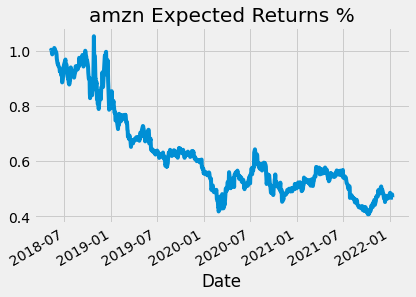

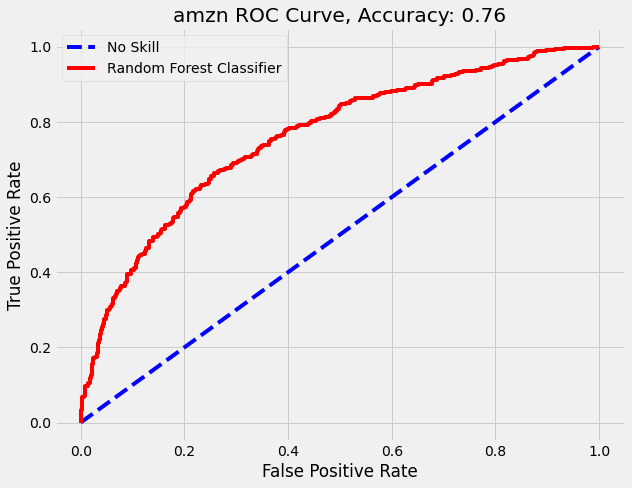

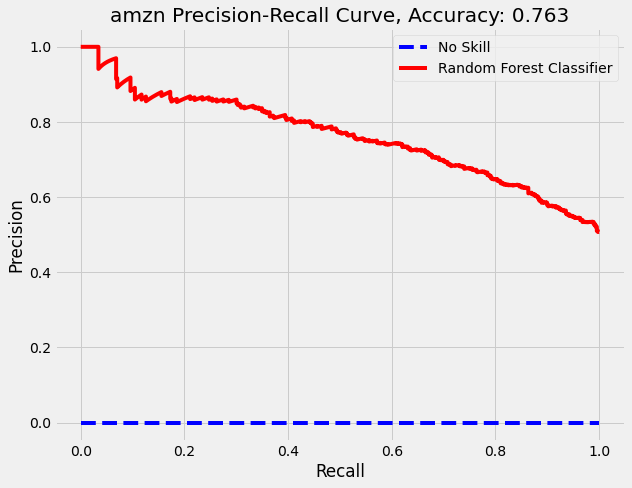

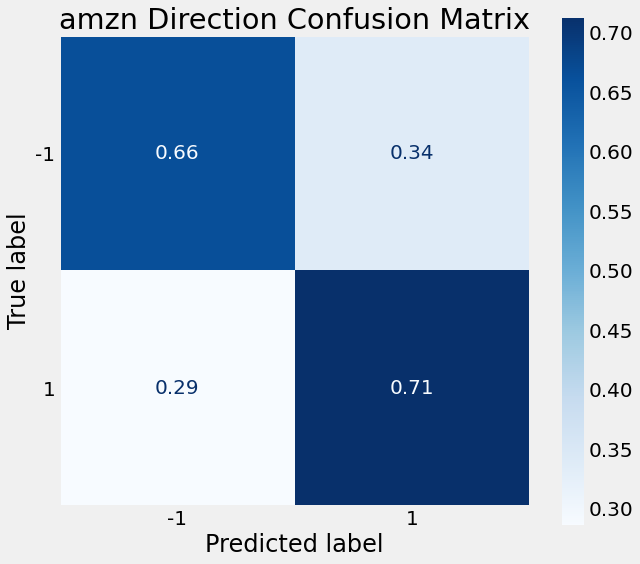

In [10]:
stock_name = 'amzn'
fn.all_func(stock_name
           , start_dates[stock_name]
           , days_ahead = 1
           , model_name = model_name
           , days_back = 1
          )

In [11]:
print("Today's date:", today)
print("Current Time =", current_time)

Today's date: 2022-01-14
Current Time = 01:06:09


In [12]:
summary_df = fn.pred_summary_df(start_dates1, stocks = [x for x in start_dates1], days_back = 1)
summary_df

,stock,Current_Price,1_Day_Pred,1_Day_Model_Return,3_Day_Pred,3_Day_Model_Return,5_Day_Pred,5_Day_Model_Return,Actual_Returns
0,a,145.169998,Buy,2.0436,Buy,1.8811,Buy,1.9956,14.7959
1,aapl,172.190002,Buy,4.2621,Buy,4.9977,Buy,5.2522,727.7412
2,adbe,516.900024,Buy,4.0450,Buy,5.3607,Buy,4.2434,138.4566
3,amat,157.179993,Buy,11.9999,Buy,9.6360,Buy,10.7526,1244.8882
4,amd,132.740005,Buy,22.0129,Buy,25.4301,Buy,26.2146,16.9986
5,amgn,230.850006,Buy,1.8426,Buy,1.9034,Buy,1.5414,364.0850
6,amzn,3224.280029,Buy,1.1628,Buy,1.0831,Buy,1.3885,269.0968
7,baba,131.369995,Buy,0.9411,Buy,0.6838,Buy,0.7942,0.6870
8,bac,48.759998,Hold or Sell,1.7343,Buy,1.9598,Buy,2.5533,66.5582
9,bby,102.599998,Hold or Sell,1.5808,Hold or Sell,1.3690,Hold or Sell,2.1534,738.1210


In [13]:
summary_df['1_Day_Model_Return'].median(), summary_df['3_Day_Model_Return'].median(), summary_df['5_Day_Model_Return'].median(), summary_df['Actual_Returns'].median()

(1.8426, 1.9034, 1.9956, 66.5582)

In [14]:
summary_df = fn.pred_summary_df(start_dates2, stocks = [x for x in start_dates2], days_back = 1)
summary_df

,stock,Current_Price,1_Day_Pred,1_Day_Model_Return,3_Day_Pred,3_Day_Model_Return,5_Day_Pred,5_Day_Model_Return,Actual_Returns
0,fslr,82.779999,Buy,1.7928,Buy,2.1779,Buy,1.9523,-0.4382
1,goog,2782.620117,Buy,2.3252,Buy,3.2051,Buy,2.5019,10.6618
2,ibm,134.759995,Hold or Sell,1.2183,Hold or Sell,1.5129,Hold or Sell,1.3327,32.0117
3,intc,54.939999,Buy,4.7708,Buy,4.2492,Buy,4.4640,232.9536
4,iyw,107.580002,Buy,2.0517,Buy,2.9085,Buy,1.8693,9.6379
5,ll,16.920000,Buy,0.6370,Buy,1.0656,Buy,1.1346,-0.2624
6,lng,112.709999,Buy,2.0191,Buy,2.0961,Buy,1.7196,24.8137
7,ma,369.519989,Hold or Sell,1.4557,Buy,1.4386,Hold or Sell,1.3803,29.1975
8,mdb,390.829987,Buy,0.9597,Buy,1.2400,Buy,1.0029,6.5290
9,msft,304.799988,Buy,7.0865,Buy,6.2984,Buy,6.7927,287.7756


In [15]:
summary_df['1_Day_Model_Return'].median(), summary_df['3_Day_Model_Return'].median(), summary_df['5_Day_Model_Return'].median(), summary_df['Actual_Returns'].median()

(1.7928, 2.0961, 1.7196, 10.6618)

In [16]:
summary_df = fn.pred_summary_df(start_dates3, stocks = [x for x in start_dates3], days_back = 1)
summary_df

,stock,Current_Price,1_Day_Pred,1_Day_Model_Return,3_Day_Pred,3_Day_Model_Return,5_Day_Pred,5_Day_Model_Return,Actual_Returns
0,okta,202.000000,Buy,0.7822,Buy,0.7686,Buy,0.9407,5.6491
1,orcl,87.790001,Buy,2.1020,Buy,2.5403,Buy,2.5973,425.9641
2,qcom,183.889999,Buy,4.1813,Buy,1.8555,Buy,2.7610,90.7982
3,qqq,377.660004,Buy,1.8945,Buy,2.1993,Buy,2.1690,17.5928
4,srpt,72.389999,Buy,1.3821,Buy,1.4030,Buy,0.8275,1.3832
5,tgt,225.830002,Hold or Sell,1.7249,Buy,2.1998,Buy,2.7038,473.1456
6,tsla,1031.560059,Buy,3.6681,Buy,3.5309,Buy,2.7275,156.9241
7,tsm,139.190002,Buy,3.6272,Buy,4.5205,Buy,6.1436,26.6273
8,v,215.000000,Buy,1.6688,Buy,1.5315,Buy,1.8684,9.8913
9,vbiv,1.910000,Buy,2.4502,Buy,2.4055,Buy,1.8937,-0.9463


In [17]:
summary_df['1_Day_Model_Return'].median(), summary_df['3_Day_Model_Return'].median(), summary_df['5_Day_Model_Return'].median(), summary_df['Actual_Returns'].median()

(1.8365, 1.8555, 1.8937, 13.3094)